In [53]:
import matplotlib.pyplot as plt
import numpy as np
!pip install opencv-python
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [54]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, cache_dir='.', untar=True)

In [55]:
data_dir

'.\\datasets\\flower_photos_extracted'

In [56]:
import pathlib
data_dir = pathlib.Path("datasets/flower_photos_extracted/flower_photos")
print(data_dir)

datasets\flower_photos_extracted\flower_photos


In [57]:
image_count=len(list(data_dir.glob('**/*.jpg')))
image_count

3670

In [58]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

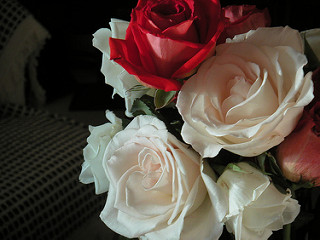

In [59]:
PIL.Image.open(str(roses[1]))

tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [60]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [61]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos_extracted/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/

In [62]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [63]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos_extracted\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [64]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [65]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [66]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [67]:
X = np.array(X)
y = np.array(y)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Building convolutional neural network and training it

In [70]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 230ms/step - accuracy: 0.3597 - loss: 1.4444
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.5778 - loss: 1.0554
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.6486 - loss: 0.9120
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.7049 - loss: 0.7669
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.8041 - loss: 0.5447
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.8819 - loss: 0.3451
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.9335 - loss: 0.2110
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9560 - loss: 0.1335
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9735 - loss: 0.0885
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.9884 - loss: 0.0435
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9945 - loss: 0.0259
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20

In [71]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6438 - loss: 2.5920


[2.591986656188965, 0.6437908411026001]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [72]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


array([[  1.6375672 ,  24.631554  ,   5.284777  , -20.780704  ,
          0.83229226],
       [  6.5171223 ,   1.270022  ,  -6.2256823 ,  -8.501343  ,
          6.099532  ],
       [ -4.8709025 ,   2.426682  ,  18.975937  , -14.503266  ,
         -2.7277954 ],
       ...,
       [ -4.811615  ,  -1.022347  ,  -7.1531973 ,   9.465218  ,
          2.8363562 ],
       [  1.1576576 ,  -0.9960516 ,  -3.0081217 ,   0.15397586,
          7.0131187 ],
       [ -1.3571537 , -14.448475  ,  -2.8341682 ,   5.722042  ,
          6.390987  ]], shape=(918, 5), dtype=float32)

In [73]:
score = tf.nn.softmax(predictions[0])

In [75]:
int(np.argmax(score))

1

In [77]:
int(y_test[0])

1

In [86]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.3)
  ]
)

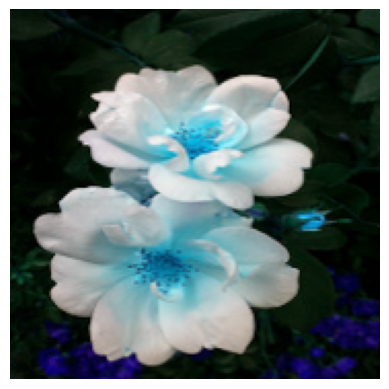

In [87]:
plt.axis('off')
plt.imshow(X[0])

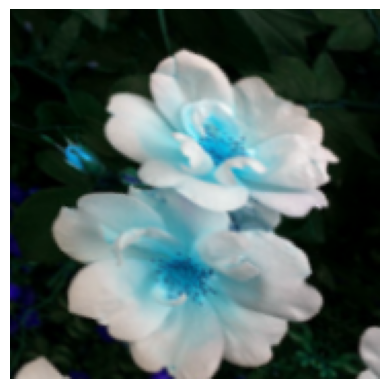

In [88]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [89]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.4451 - loss: 1.3031
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 321ms/step - accuracy: 0.5719 - loss: 1.0472
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 319ms/step - accuracy: 0.6210 - loss: 0.9948
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.6541 - loss: 0.8870
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 321ms/step - accuracy: 0.6868 - loss: 0.8111
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.6969 - loss: 0.7910
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 341ms/step - accuracy: 0.7144 - loss: 0.7466
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 343ms/step - accuracy: 0.7071 - loss: 0.7317
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - accuracy: 0.7304 - loss: 0.6963
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 327ms/step - accuracy: 0.7336 - loss: 0.6879
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 323ms/step - accuracy: 0.7438 - loss: 0.6626
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28

In [90]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7462 - loss: 0.7821


[0.7821370959281921, 0.7461873888969421]